* Thomas Ngo
* Tevin Vu
* Rachana Chittari


Project 02


## 1. Load and examine the Boston dataset’s features, target values, and description.

In [93]:
import pandas as pd
from sklearn import datasets

dataset_boston = datasets.load_boston()

#Load and examine the Boston dataset's features
print("Boston dataset's features: ")
df_boston_features = pd.DataFrame(data = dataset_boston.data,
                                  columns = dataset_boston.feature_names)
print(df_boston_features)

#Load and examine the Boston target values
df_boston_target = pd.DataFrame(data = dataset_boston.target,
                                columns = ['MEDV'])
print("Boston dataset's target value: ")
print(dataset_boston.target)

#Load the Boston dataset's description
print(dataset_boston.DESCR)

Boston dataset's features: 
        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x

## 2. Use sklearn.model_selection.train_test_split() to split the features and values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing.


In [94]:
import numpy as np
from sklearn.model_selection import train_test_split

xAll = dataset_boston.data
yMEDV = pd.DataFrame(data=dataset_boston.target,
                               columns=['MEDV']).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(xAll, yMEDV, test_size=0.2, shuffle=False)


3. Create a scatterplot of the training set showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?

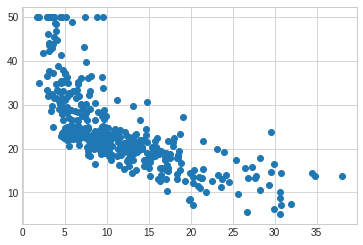

In [95]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
dataset_LSTAT = X_train[:,12].reshape([-1,1])

plt.scatter(dataset_LSTAT, y_train)

The relationship apprears pretty linear

4. With LSTAT as X and MEDV as t, use np.linalg.inv() to compute w for the training set. What is the equation for MEDV as a linear function of LSTAT?

In [96]:
X = np.hstack((np.ones_like(dataset_LSTAT),dataset_LSTAT))
t = y_train
XX = np.dot(X.T, X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print (w)

[[35.0961864 ]
 [-0.96173416]]


The equation for MEDV as a function of LSTAT:

$ f(x; w_0, w_1) = 35.096 - 0.962x $

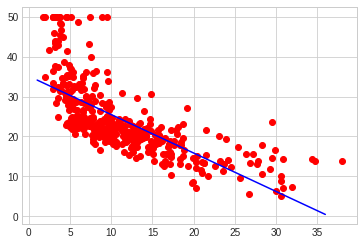

In [97]:
testx = np.linspace(1,36,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)
plt.figure()
X_LSTAT = X_train[:,12].reshape([-1,1])

plt.plot(X_LSTAT,y_train,'ro')
plt.plot(testx,testt,'b')

The model apprear to fit the training set is not pretty well.

6. Use w to find the response for each value of the LSTAT attribute in the test set, then compute the test MSE 𝓛 for the model.

In [98]:
XLS_test = X_test[:,12].reshape([-1,1])
#print(XLS_test)
testX = np.hstack((np.ones_like(XLS_test), XLS_test))
#print(y_test)
t_rsp = np.dot(testX,w) 
#print(t_rsp)
mse = np.square(np.subtract(t_rsp, y_test)).mean()
print(mse)

22.99311505641531


## 7. Now add an x2 column to LSTAT’s x column in the training set, then repeat experiments (4), (5), and (6) for MEDV as a quadratic function of LSTAT. Does the quadratic polynomial do a better job of predicting the values in the test set?

In [99]:
xLS = X_train[:,12].reshape([-1,1])

#print(xLS)
#print(y_train)
XLS = np.hstack((np.ones_like(xLS), xLS, xLS**2))
#print(XLS)
XXLS = np.dot(XLS.T, XLS)
invXXLS = np.linalg.inv(XXLS)
XtLS = np.dot(XLS.T, y_train)
w_sq = np.dot(invXXLS, XtLS)
print(w_sq)

[[43.55741498]
 [-2.44319997]
 [ 0.04767261]]


$ f(x;w_0, w_1, w_2) = 43.5574 - 2.4431x + 0.0476x^2 $

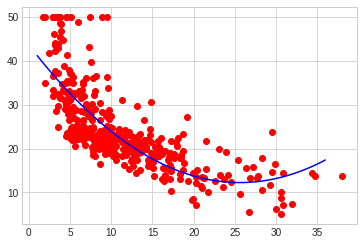

In [100]:
testxLS = np.linspace(1,36,100)[:,None]
testX = np.hstack((np.ones_like(testxLS),testxLS, testxLS**2))
testt = np.dot(testX,w_sq)
plt.figure()
X_LSTAT = X_train[:,12].reshape([-1,1])
plt.plot(X_LSTAT,y_train,'ro')
plt.plot(testxLS,testt,'b')

In [101]:
#MSE of quadratic function
XLS_test_sq = X_test[:,12].reshape([-1,1])
#print(XLS_test)
testX_sq = np.hstack((np.ones_like(XLS_test_sq), XLS_test_sq, XLS_test_sq**2))
#print(y_test)
t_rsp_sq = np.dot(testX_sq,w_sq) 
#print(t_rsp)
mse = np.square(np.subtract(t_rsp_sq, y_test)).mean()
print(mse)



18.095598402851703


The quadratic polynomial did a better job of predicting the values in the test set because MSE of quadratic is less than the MSE of linear regression.


## 8. Repeat experiments (4) and (6) with all 13 input features as X and using np.linalg.lstsq(). (See the Appendix to Linear regression in vector and matrix format for details of why we need to switch away from np.linalg.inv(), and the notes for np.linalg.solve() for why we shouldn’t use that either.) Does adding additional features improve the performance on the test set compared to using only LSTAT?

In [102]:
X_13_ones_col = np.ones_like(X_train[:,0].reshape([-1,1]))
X_13_train = np.hstack((X_13_ones_col, X_train))

w13_trn = np.linalg.lstsq(X_13_train, y_train, rcond=None)[0]

In [103]:
testX_13 = np.hstack((np.ones_like(X_test[:,0].reshape([-1,1])), X_test))
t_13_re = np.dot(testX_13,w13_trn) 
mse_13_test = np.square(np.subtract(t_13_re, y_test)).mean()
print(mse_13_test)

32.7998626802041


## Does adding additional features improve the performance on the test set compared to using only LSTAT?
No since test set MSE of 13 features (32.799) is larger than test MSE of only LSTAT (22.99)

# 9. Now add x2 columns for all 13 features, and repeat experiment (8). Does adding quadratic features improve the performance on the test set compared to using only linear features?

In [104]:
X_sq_13 = np.hstack((X_13_ones_col, X_train))
for i in range(0,13):
    X_sq_13 = np.hstack((X_sq_13,(X_train[:,i]**2).reshape([-1,1])))
w_sq_13 = np.linalg.lstsq(X_sq_13, y_train, rcond=None)[0]
# w_sq_13

In [105]:
testX_sq_13 = np.hstack((np.ones_like(X_test[:,0].reshape([-1,1])), X_test))
for i in range(0,13):
    testX_sq_13 = np.hstack((testX_sq_13,(X_test[:,i]**2).reshape([-1,1])))
t_sq_13_re = np.dot(testX_sq_13,w_sq_13) 
mse_sq_13_test = np.square(np.subtract(t_sq_13_re, y_test)).mean()
print(mse_sq_13_test)

33.96827741319936


In [106]:
# #Let calculate the mean square loss of all X values on the test set
# tempCol1_test = np.ones_like(X_test[:,12].reshape([-1,1]))
# X_test13 = np.hstack((tempCol1_test, X_test))
# X_13 = X_test13
# y_13 = np.dot(X_13, w_13)
# #Mean Square Loss
# mse = (np.square(y_13 - y_test)).mean()
# print(mse)

Mean Square loss of LSTAT is 22.99 <  Mean Square Loss of all 13 input features is 32.79 so adding additional features doesn't improve the performance on the test set compared to using only LSTAT.


In [107]:
#compare the result on 8 with using sklearn
from sklearn.linear_model import LinearRegression
modelAll = LinearRegression(fit_intercept = True)
modelAll.fit(X_train, y_train)
print("Model slope:", modelAll.coef_)
print("Model intercept: ", modelAll.intercept_)

Model slope: [[-2.02135297e-01  4.41276341e-02  5.26739364e-02  1.88474315e+00
  -1.49281487e+01  4.76038673e+00  2.88734527e-03 -1.30025278e+00
   4.61661953e-01 -1.55434673e-02 -8.11632369e-01 -1.97174433e-03
  -5.32273431e-01]]
Model intercept:  [30.07716692]


Since the Mean Square Loss of test set when adding x^2 columns for all 13 features is 33.96 greater than the Mean Square Loss of test set of using only linear feature is 22.99. That means adding the quadratic features doesn't improve the performance on the test set compared to using only linear features

## 10. Compute the training MSE for experiments (8) and (9) and compare it to the test MSE. What explains the difference?



In [108]:
trainX_13 = np.hstack((np.ones_like(X_train[:,0].reshape([-1,1])), X_train))
t_13_re = np.dot(trainX_13,w13_trn) 
mse_13_train = np.square(np.subtract(t_13_re, y_train)).mean()
print(mse_13_train)

22.77837952180079


In [109]:
trainX_sq_13 = np.hstack((np.ones_like(X_train[:,0].reshape([-1,1])), X_train))
for i in range(0,13):
    trainX_sq_13 = np.hstack((trainX_sq_13,(X_train[:,i]**2).reshape([-1,1])))
t_sq_13_re = np.dot(trainX_sq_13,w_sq_13) 
mse_sq_13_train = np.square(np.subtract(t_sq_13_re, y_train)).mean()
print(mse_sq_13_train)

14.485636586720954


Training MSE for experience (8): 22.77
Testing MSE for experience (8): 32.79
Training MSE for experience (9): 14.48
Testing MSE for experience (9): 33.96

With experience (8): MSE(training) < MSE(test) it is toward to overfit model.
Same with experience (9) MSE(training) < MSE (test) it is toward to overfit model




## 11. Repeat experiments (9) and (10), adding  $ x^3 $ columns in addition to the existing x and x2 columns for each feature. Does the cubic polynomial do a better job of predicting the values in the training set? Does it do a better job of predicting the values in the test set?

Compute test MSE of cubic model

In [120]:
X_cube_13 = np.hstack((X_13_ones_col, X_train))
for j in range(2,4):
    for i in range(0,13):
        X_cube_13 = np.hstack((X_cube_13,(X_train[:,i]**j).reshape([-1,1])))
w_cube_13 = np.linalg.lstsq(X_cube_13, y_train, rcond=None)[0]
# w_cube_13

In [118]:
testX_cube_13 = np.hstack((np.ones_like(X_test[:,0].reshape([-1,1])), X_test))
for j in range(2,4):
    for i in range(0,13):
        testX_cube_13 = np.hstack((testX_cube_13,(X_test[:,i]**j).reshape([-1,1])))
t_cube_13_re = np.dot(testX_cube_13,w_cube_13) 
mse_cube_13_test = np.square(np.subtract(t_cube_13_re, y_test)).mean()
print(mse_cube_13_test)

31.729358133791994


Compute training MSE of cubic model

In [119]:
testX_cube_13 = np.hstack((np.ones_like(X_train[:,0].reshape([-1,1])), X_train))
for j in range(2,4):
    for i in range(0,13):
        testX_cube_13 = np.hstack((testX_cube_13,(X_train[:,i]**j).reshape([-1,1])))
t_cube_13_re = np.dot(testX_cube_13,w_cube_13) 
mse_cube_13_train = np.square(np.subtract(t_cube_13_re, y_train)).mean()
print(mse_cube_13_train)

12.797747149785682


# Conclusion:
## For training set,
- The training MSE of linear = 22.778
- The training MSE of quadratic = 14.485
- The training MSE of cubic = 12.797
## Does the cubic polynomial do a better job of predicting the values in the training set?
### Yes, it does a better job because it has the lowest MSE on the training set.

## For test set,
- The test MSE of linear = 32.799
- The test MSE of quadratic = 33.968
- The test MSE of cubic = 31.729
## Does the cubic polynomial do a better job of predicting the values in the training set?
### Yes, it does a better job because it has the lowest MSE on the test set as well.